In [111]:
import sys
PATH = '/Users/angge/Documents/BigData/'
DIR_DATA = '../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn import preprocessing
from tensorflow import keras

filename = DIR_DATA + 'Data_CASAB.csv'

In [112]:
start = time.time()
data_raw= pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.005366802215576172 sec


In [113]:
data = pd.concat(data_raw)
data.head() 

,Unnamed: 0,Unnamed: 0.1,client,country,timestamp,method,request,status,user_agent
0,0,0,161.10.61.118,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,1,1,186.82.85.225,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,2,2,186.116.84.160,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,3,3,161.10.56.234,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,4,4,179.14.33.112,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 9 columns):
Unnamed: 0      1275 non-null int64
Unnamed: 0.1    1275 non-null int64
client          1275 non-null object
country         1275 non-null object
timestamp       1275 non-null object
method          1275 non-null object
request         1275 non-null object
status          1275 non-null int64
user_agent      1275 non-null object
dtypes: int64(3), object(6)
memory usage: 89.8+ KB


In [115]:
data.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
client          0
country         0
timestamp       0
method          0
request         0
status          0
user_agent      0
dtype: int64

# no hay datos faltantes

In [116]:
#usamos describe para sascra datos estadisticos del dataset
data.describe()

,Unnamed: 0,Unnamed: 0.1,status
count,1275.000000,1275.000000,1275.000000
mean,205.431373,205.431373,248.627451
std,187.031807,187.031807,85.829127
min,0.000000,0.000000,200.000000
25%,63.000000,63.000000,200.000000
50%,127.000000,127.000000,200.000000
75%,335.500000,335.500000,200.000000
max,654.000000,654.000000,400.000000


In [117]:
data['Unnamed: 0.1'].value_counts().to_frame()

,Unnamed: 0.1
0,5
106,5
99,5
100,5
101,5
...,...
435,1
434,1
433,1
432,1


In [118]:
data['Unnamed: 0'].value_counts().to_frame()

,Unnamed: 0
0,5
106,5
99,5
100,5
101,5
...,...
435,1
434,1
433,1
432,1


In [119]:
data['client'].value_counts().to_frame()

,client
179.14.33.112,255
186.82.85.225,255
186.116.84.160,255
161.10.56.234,255
161.10.61.118,255


In [120]:
data['country'].value_counts().to_frame()

,country
Colombia,1275


In [121]:
data['timestamp'].value_counts().to_frame()

,timestamp
2022-03-08T19:49:07.666808000,10
2022-03-24T19:49:07.666808000,10
2022-03-16T19:49:07.666808000,10
2022-02-27T19:49:07.666808000,10
2022-02-23T19:49:07.666808000,10
...,...
2022-02-26T06:02:14.194665000,5
2022-03-26T19:49:07.666808000,5
2022-04-29T19:49:07.666808000,5
2022-02-27T15:11:33.172457000,5


In [122]:
data['method'].value_counts().to_frame()

,method
POST,1275


In [123]:
 data['request'].value_counts().to_frame()

,request
https://casab-nodejs.herokuapp.com/api/user/login,1275


In [124]:
 data['status'].value_counts().to_frame()

,status
200,965
400,310


In [125]:
  data['user_agent'].value_counts().to_frame()

,user_agent
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36",765
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53",255
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 OPR/86.0.4363.70",255


In [126]:
data.drop(["Unnamed: 0.1", "Unnamed: 0", "request", "method", "user_agent"],axis=1, inplace=True)
data

,client,country,timestamp,status
0,161.10.61.118,Colombia,2022-02-22T19:49:07.666808000,200
1,186.82.85.225,Colombia,2022-02-22T19:49:07.666808000,200
2,186.116.84.160,Colombia,2022-02-22T19:49:07.666808000,200
3,161.10.56.234,Colombia,2022-02-22T19:49:07.666808000,200
4,179.14.33.112,Colombia,2022-02-22T19:49:07.666808000,200
...,...,...,...,...
1270,161.10.61.118,Colombia,2022-03-25T00:05:36.542950000,200
1271,186.82.85.225,Colombia,2022-03-25T00:05:36.542950000,200
1272,186.116.84.160,Colombia,2022-03-25T00:05:36.542950000,200
1273,161.10.56.234,Colombia,2022-03-25T00:05:36.542950000,400


In [127]:
time = data["timestamp"]
time

0       2022-02-22T19:49:07.666808000
1       2022-02-22T19:49:07.666808000
2       2022-02-22T19:49:07.666808000
3       2022-02-22T19:49:07.666808000
4       2022-02-22T19:49:07.666808000
                    ...              
1270    2022-03-25T00:05:36.542950000
1271    2022-03-25T00:05:36.542950000
1272    2022-03-25T00:05:36.542950000
1273    2022-03-25T00:05:36.542950000
1274    2022-03-25T00:05:36.542950000
Name: timestamp, Length: 1275, dtype: object

In [128]:
 time = data['timestamp'].str.split('T', expand=True)
time[1]

0       19:49:07.666808000
1       19:49:07.666808000
2       19:49:07.666808000
3       19:49:07.666808000
4       19:49:07.666808000
               ...        
1270    00:05:36.542950000
1271    00:05:36.542950000
1272    00:05:36.542950000
1273    00:05:36.542950000
1274    00:05:36.542950000
Name: 1, Length: 1275, dtype: object

In [129]:
data.insert(4, "Time" , time[1])

In [130]:
data.insert(4, "Date" , time[0])

In [131]:
data

,client,country,timestamp,status,Date,Time
0,161.10.61.118,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
1,186.82.85.225,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
2,186.116.84.160,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
3,161.10.56.234,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
4,179.14.33.112,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
...,...,...,...,...,...,...
1270,161.10.61.118,Colombia,2022-03-25T00:05:36.542950000,200,2022-03-25,00:05:36.542950000
1271,186.82.85.225,Colombia,2022-03-25T00:05:36.542950000,200,2022-03-25,00:05:36.542950000
1272,186.116.84.160,Colombia,2022-03-25T00:05:36.542950000,200,2022-03-25,00:05:36.542950000
1273,161.10.56.234,Colombia,2022-03-25T00:05:36.542950000,400,2022-03-25,00:05:36.542950000


In [132]:
data.drop(columns =["timestamp"], inplace = True)
data

,client,country,status,Date,Time
0,161.10.61.118,Colombia,200,2022-02-22,19:49:07.666808000
1,186.82.85.225,Colombia,200,2022-02-22,19:49:07.666808000
2,186.116.84.160,Colombia,200,2022-02-22,19:49:07.666808000
3,161.10.56.234,Colombia,200,2022-02-22,19:49:07.666808000
4,179.14.33.112,Colombia,200,2022-02-22,19:49:07.666808000
...,...,...,...,...,...
1270,161.10.61.118,Colombia,200,2022-03-25,00:05:36.542950000
1271,186.82.85.225,Colombia,200,2022-03-25,00:05:36.542950000
1272,186.116.84.160,Colombia,200,2022-03-25,00:05:36.542950000
1273,161.10.56.234,Colombia,400,2022-03-25,00:05:36.542950000


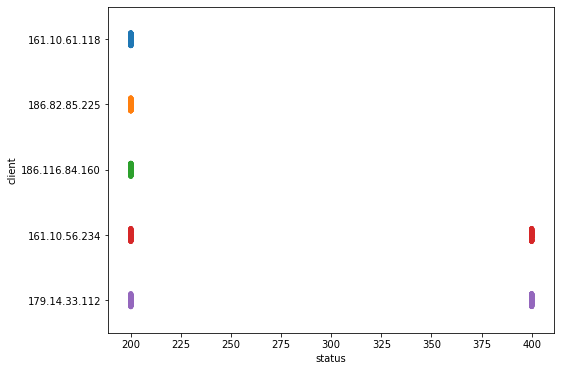

In [133]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="status", y="client", data=data)
plt.show()

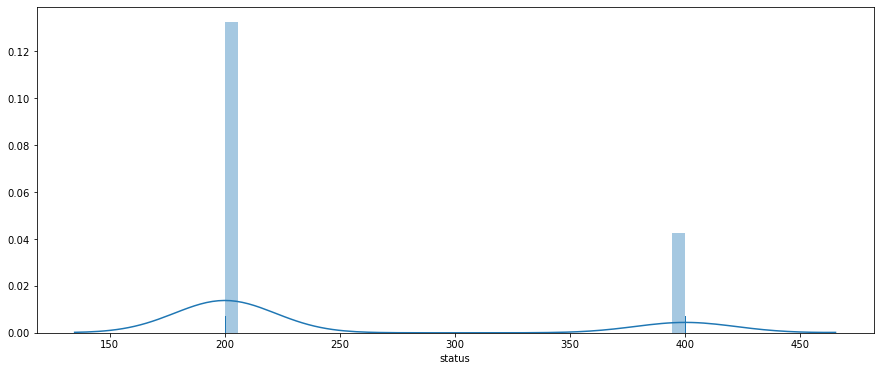

In [134]:
f,ax = plt.subplots(figsize=(15,6)) 
ax = sns.distplot(data['status'],rug=True)
plt.show()

In [135]:
data['Date']=data['Date'].replace("-"," ")
data

,client,country,status,Date,Time
0,161.10.61.118,Colombia,200,2022-02-22,19:49:07.666808000
1,186.82.85.225,Colombia,200,2022-02-22,19:49:07.666808000
2,186.116.84.160,Colombia,200,2022-02-22,19:49:07.666808000
3,161.10.56.234,Colombia,200,2022-02-22,19:49:07.666808000
4,179.14.33.112,Colombia,200,2022-02-22,19:49:07.666808000
...,...,...,...,...,...
1270,161.10.61.118,Colombia,200,2022-03-25,00:05:36.542950000
1271,186.82.85.225,Colombia,200,2022-03-25,00:05:36.542950000
1272,186.116.84.160,Colombia,200,2022-03-25,00:05:36.542950000
1273,161.10.56.234,Colombia,400,2022-03-25,00:05:36.542950000


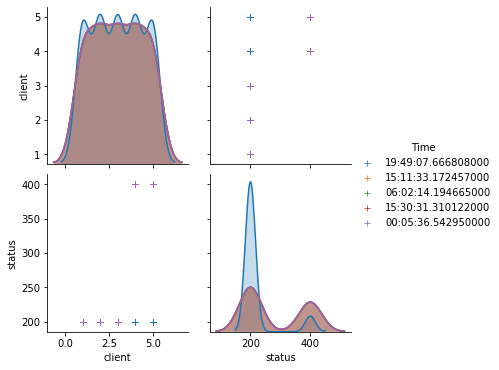

In [150]:
g = sns.pairplot(data, hue='Time', markers='+')
plt.show()

In [136]:
data['client'] = data['client'].map({"161.10.61.118": 1, "186.82.85.225": 2, "186.116.84.160": 3, "161.10.56.234": 4, "179.14.33.112":5},na_action=None)
data

,client,country,status,Date,Time
0,1,Colombia,200,2022-02-22,19:49:07.666808000
1,2,Colombia,200,2022-02-22,19:49:07.666808000
2,3,Colombia,200,2022-02-22,19:49:07.666808000
3,4,Colombia,200,2022-02-22,19:49:07.666808000
4,5,Colombia,200,2022-02-22,19:49:07.666808000
...,...,...,...,...,...
1270,1,Colombia,200,2022-03-25,00:05:36.542950000
1271,2,Colombia,200,2022-03-25,00:05:36.542950000
1272,3,Colombia,200,2022-03-25,00:05:36.542950000
1273,4,Colombia,400,2022-03-25,00:05:36.542950000


In [137]:
data['country'].astype(str)
data['client'].astype(float)
data['status'].astype(float)

0       200.0
1       200.0
2       200.0
3       200.0
4       200.0
        ...  
1270    200.0
1271    200.0
1272    200.0
1273    400.0
1274    400.0
Name: status, Length: 1275, dtype: float64

In [138]:
x= data['client']
x

0       1
1       2
2       3
3       4
4       5
       ..
1270    1
1271    2
1272    3
1273    4
1274    5
Name: client, Length: 1275, dtype: int64

In [139]:
y = data['status']
y

0       200
1       200
2       200
3       200
4       200
       ... 
1270    200
1271    200
1272    200
1273    400
1274    400
Name: status, Length: 1275, dtype: int64

## Red neuronal 

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [142]:
x = np.arange(1500).reshape(-1,1)
y = np.arange(1500).reshape(-1,1)

In [101]:
model = keras.models.Sequential()
model.add(Dense(16, input_dim=2, activation='relu',input_shape=(64,1)))
model.add(LSTM(128,activation = "relu", return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
       
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64, 16)            32        
_________________________________________________________________
lstm_11 (LSTM)               (None, 64, 128)           74240     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 128)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 205,985
Trainable params: 205,985
Non-trainable params: 0
_________________________________________________________________


In [146]:
#model.fit(x_train,y_train, epochs=150)
history= model.fit(x_train, y_train, epochs=1000, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 137ms/step - loss: 0.3542 - accuracy: 0.3333 - val_loss: 0.1229 - val_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3529 - accuracy: 0.0000e+00 - val_loss: 0.1240 - val_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3516 - accuracy: 0.0000e+00 - val_loss: 0.1252 - val_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3503 - accuracy: 0.0000e+00 - val_loss: 0.1263 - val_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3491 - accuracy: 0.0000e+00 - val_loss: 0.1275 - val_accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3478 - accuracy: 0.0000e+00 - val_loss: 0.1287 - val_accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3465 - accuracy: 0.0000e+00 - val_loss: 0.1298 - val_accur

In [147]:
scores = model.evaluate(x_train, y_train)

1/1 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.7500


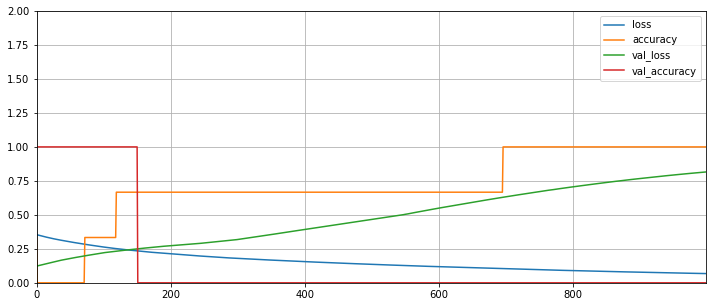

In [148]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()